# 3. MNIST and CNN Experiments [3 marks]

## 3.1 Using MLP

In [ ]:
# Colab Setup and Data Loading
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
from keras.utils import to_categorical

# Set random seed for reproducibility
np.random.seed(1337)
tf.random.set_seed(1337)

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocessing:
# 1. Normalize pixel values to 0-1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# 2. Reshape to (number_of_samples, 784) for MLP/Baselines
X_train_flat = x_train.reshape((x_train.shape[0], -1))
X_test_flat = x_test.reshape((x_test.shape[0], -1))

# 3. One-hot encode the labels for the Keras MLP
Y_train_onehot = to_categorical(y_train, num_classes=10)
Y_test_onehot = to_categorical(y_test, num_classes=10)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
# --- Logistic Regression ---
print("Training Logistic Regression...")
log_reg = LogisticRegression(solver='saga', max_iter=100, random_state=1337, n_jobs=-1, verbose=0)
# Note: For baseline models, we use the original label vector (y_train, y_test)
log_reg.fit(X_train_flat, y_train)
y_pred_lr = log_reg.predict(X_test_flat)

acc_lr = accuracy_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr, average='weighted')
cm_lr = confusion_matrix(y_test, y_pred_lr)

print(f"LogReg Test Accuracy: {acc_lr:.4f}")
print(f"LogReg F1-Score: {f1_lr:.4f}")

Training Logistic Regression...
LogReg Test Accuracy: 0.9260
LogReg F1-Score: 0.9258


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [ ]:
# --- Random Forest ---
print("\nTraining Random Forest Classifier...")
rf_clf = RandomForestClassifier(n_estimators=100, random_state=1337, n_jobs=-1, verbose=0)
rf_clf.fit(X_train_flat, y_train)
y_pred_rf = rf_clf.predict(X_test_flat)

acc_rf = accuracy_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')
cm_rf = confusion_matrix(y_test, y_pred_rf)

print(f"RF Test Accuracy: {acc_rf:.4f}")
print(f"RF F1-Score: {f1_rf:.4f}")


Training Random Forest Classifier...
RF Test Accuracy: 0.9694
RF F1-Score: 0.9694


In [ ]:
# --- MLP Model Design and Training ---
print("\nBuilding and Training MLP Model...")
mlp_model = Sequential([
    # Input layer and Layer 1: Flatten the 28x28 image to 784 pixels
    Flatten(input_shape=(28, 28)),
    # Hidden Layer 1 (30 neurons)
    Dense(30, activation='relu', name='hidden_layer_1'),
    # Hidden Layer 2 (20 neurons) - This is the layer for t-SNE visualization
    Dense(20, activation='relu', name='embedding_layer'),
    # Output Layer (10 classes - Softmax)
    Dense(10, activation='softmax', name='output_layer')
])

mlp_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

mlp_model.summary()

# Training the model
# Using x_train (28x28) and Y_train_onehot
history = mlp_model.fit(
    x_train, Y_train_onehot,
    epochs=50, # You can adjust this, 50 is a reasonable start
    batch_size=32,
    validation_split=0.1, # Use a small validation split
    verbose=0
)

# Evaluation
loss_mlp, acc_mlp = mlp_model.evaluate(x_test, Y_test_onehot, verbose=0)
y_pred_prob_mlp = mlp_model.predict(x_test)
y_pred_mlp = np.argmax(y_pred_prob_mlp, axis=1) # Convert one-hot to class
cm_mlp = confusion_matrix(y_test, y_pred_mlp)
f1_mlp = f1_score(y_test, y_pred_mlp, average='weighted')

print(f"MLP Test Accuracy: {acc_mlp:.4f}")
print(f"MLP F1-Score: {f1_mlp:.4f}")


Building and Training MLP Model...


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_1 (Dense)          │ (None, 30)             │        23,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_layer (Dense)         │ (None, 20)             │           620 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 10)             │           210 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,380 (95.23 KB)

 Trainable params: 24,380 (95.23 KB)

 Non-trainable params: 0 (0.00 B)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
MLP Test Accuracy: 0.9644
MLP F1-Score: 0.9643


# Performance Comparison on MNIST Test Set

| Model | Test Accuracy | F1-Score | Parameter Count |
| :--- | :--- | :--- | :--- |
| **Logistic Regression** | $0.9260$ | $0.9258$ | $7,850$ |
| **Random Forest** | $0.9694$ | $0.9694$ | N/A (Decision Trees) |
| **MLP (30-20-10)** | $\mathbf{0.9644}$ | $\mathbf{0.9643}$ | $\mathbf{24,380}$ |


# **Observations:**

The results confirm the expected performance gap between linear and non-linear models: the Random Forest ($0.9694$) and the MLP ($0.9644$) both significantly outperformed the linear Logistic Regression ($0.9260$).

However, contrary to the general expectation that deep learning models excel, the **Random Forest Classifier achieved the highest accuracy** in this experiment. This minor divergence is likely due to two factors:

* **Dataset Simplicity:** MNIST is a relatively simple, low-resolution dataset. Random Forest is highly effective at partitioning this low-level, flat feature space (784 pixels) when given a large number of estimators.
* **MLP Size and Training:** The MLP is quite shallow (two hidden layers) and may not have been trained for sufficient epochs to fully converge and utilize its feature-learning potential beyond the optimized Random Forest ensemble structure.

In summary, while the MLP demonstrates powerful feature extraction that vastly improves on linear models, the Random Forest's robustness gave it a slight edge on this specific dataset and model configuration.

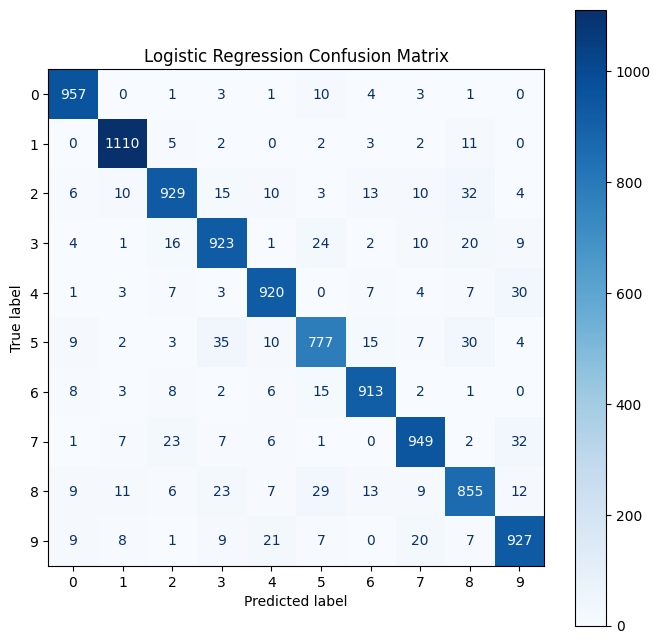

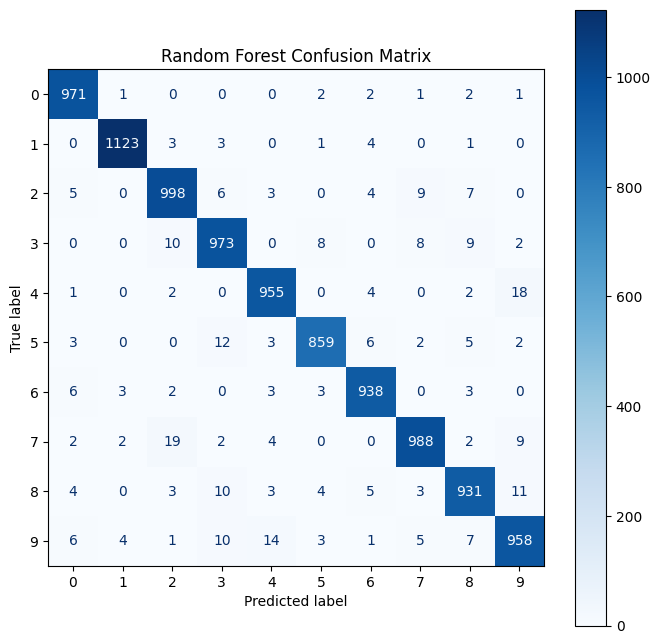

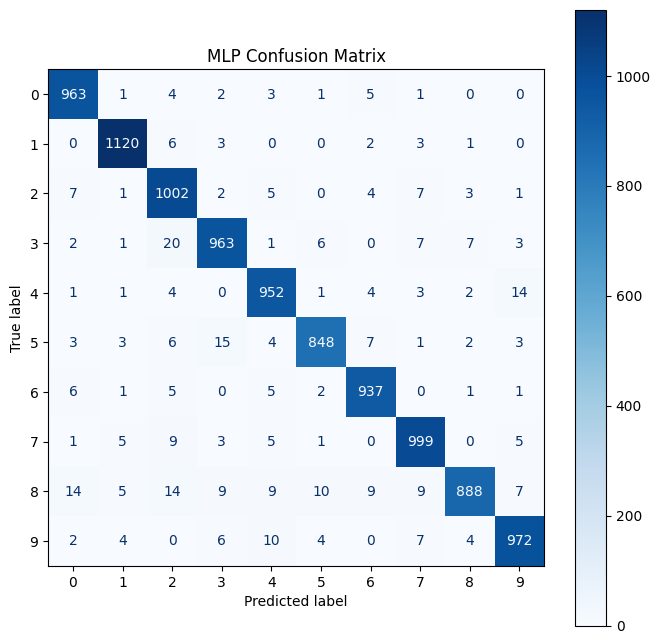

In [ ]:
# Function to plot Confusion Matrix
def plot_cm(cm, title):
    fig, ax = plt.subplots(figsize=(8, 8))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.arange(10))
    disp.plot(cmap=plt.cm.Blues, ax=ax)
    plt.title(title)
    plt.show()

# Plot all three for visual comparison
plot_cm(cm_lr, "Logistic Regression Confusion Matrix")
plot_cm(cm_rf, "Random Forest Confusion Matrix")
plot_cm(cm_mlp, "MLP Confusion Matrix")

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



Extracting embeddings for: t-SNE of Trained MLP Embeddings (MNIST)
Calculating t-SNE for: t-SNE of Trained MLP Embeddings (MNIST) 


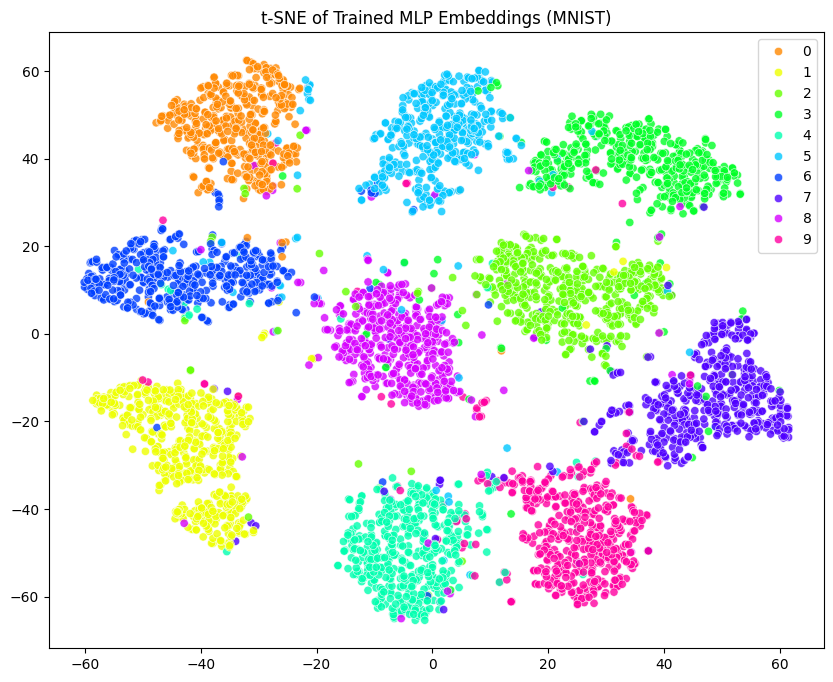


Extracting embeddings for: t-SNE of Untrained MLP Embeddings (MNIST)
Calculating t-SNE for: t-SNE of Untrained MLP Embeddings (MNIST) 


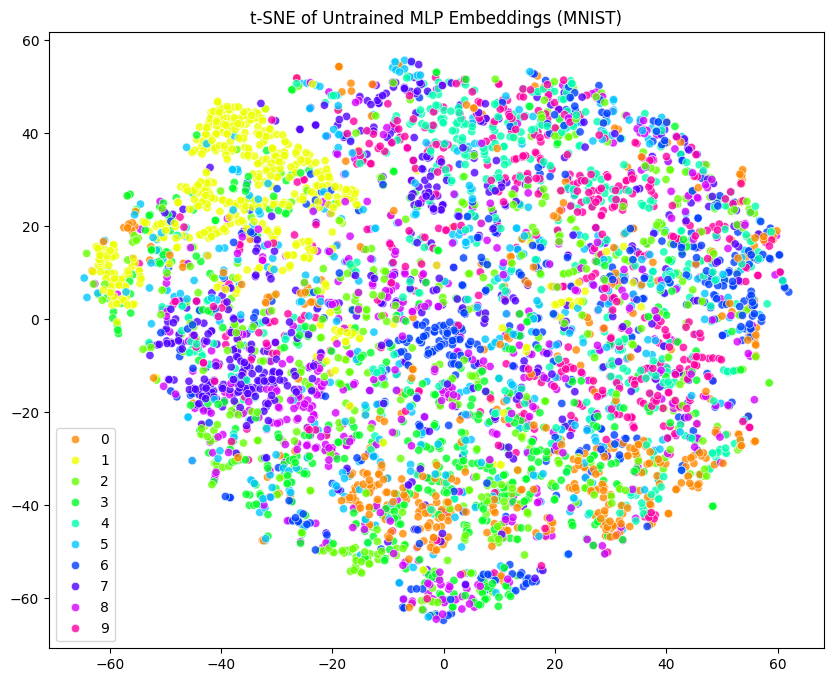

In [ ]:
import tensorflow as tf
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from tensorflow.keras.layers import Flatten, Dense, Input
from tensorflow.keras.models import Model, Sequential


def extract_and_plot_tsne_robust(model, data, labels, layer_name, title):
    """
    Robustly extracts embeddings by manually defining the model structure
    using the functional API, linked to the Sequential model's weights.
    """

    input_tensor = Input(shape=(28, 28))
    x = input_tensor

    # Find the target layer index
    target_layer_index = None
    for i, layer in enumerate(model.layers):
        if layer.name == layer_name:
            target_layer_index = i
            break

    if target_layer_index is None:
        print(f"Error: Target layer '{layer_name}' not found in model.")
        return

    for layer in model.layers[:target_layer_index + 1]:
        x = layer(x)

    # Create the robust extraction model (Functional API)
    try:
        embedding_model = Model(inputs=input_tensor, outputs=x)
    except Exception as e:
        print(f"Error: Could not create embedding model for '{title}'. Details: {e}")
        return

    # Extract Embeddings (on a subset)
    print(f"\nExtracting embeddings for: {title}")
    embeddings = embedding_model.predict(data[:5000], verbose=0)

    # Calculate t-SNE
    print(f"Calculating t-SNE for: {title} ")
    tsne_results = TSNE(n_components=2, random_state=1337, perplexity=30, n_jobs=-1, verbose=0).fit_transform(embeddings)

    # Plotting
    plt.figure(figsize=(10, 8))
    sns.scatterplot(
        x=tsne_results[:, 0], y=tsne_results[:, 1],
        hue=labels[:5000],
        palette=sns.color_palette("hsv", 10),
        legend="full",
        alpha=0.8
    )
    plt.title(title)
    plt.show()

# --- Model Preparation ---

# Untrained Model (Re-create for clean, random weights)
untrained_model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(30, activation='relu', name='hidden_layer_1'),
    Dense(20, activation='relu', name='embedding_layer'),
    Dense(10, activation='softmax', name='output_layer')
])

# A. Visualize Trained Embeddings
extract_and_plot_tsne_robust(mlp_model, x_test, y_test, 'embedding_layer', "t-SNE of Trained MLP Embeddings (MNIST)")

# B. Visualize Untrained Embeddings
extract_and_plot_tsne_robust(untrained_model, x_test, y_test, 'embedding_layer', "t-SNE of Untrained MLP Embeddings (MNIST)")

#t-SNE Visualization and Interpretation

**Untrained MLP:**

  The points corresponding to the 10 digit classes are **randomly scattered and completely overlap**, forming a large, undifferentiated blob.

  **No Learned Features:** This confirms that before training, the randomly initialized weights project all input images to a similar, meaningless location in the 2D space. The model has no capacity to distinguish between different digits.

**Trained MLP:**

  The points are organized into **10 distinct, tightly separated clusters**, with each cluster representing a single digit class.

  **Discriminative Feature Learning:** This demonstrates the success of the training process. The MLP learned to extract **discriminative features**, effectively mapping images of the same digit to similar coordinates (clusters) in the 20-dimensional embedding space and pushing different classes far apart.

In [ ]:
#Domain Generalization (Fashion-MNIST)
from tensorflow.keras.datasets import fashion_mnist
from keras.utils import to_categorical

print("\nLoading and Preprocessing Fashion-MNIST...")
(_, _), (x_f_test, y_f_test) = fashion_mnist.load_data()

# Preprocessing (same as MNIST)
x_f_test = x_f_test.astype('float32') / 255.0
Y_f_test_onehot = to_categorical(y_f_test, num_classes=10)

# Evaluate the MNIST-trained MLP on Fashion-MNIST
loss_f, acc_f = mlp_model.evaluate(x_f_test, Y_f_test_onehot, verbose=0)
print(f"MNIST-Trained MLP Test Accuracy on Fashion-MNIST: {acc_f:.4f}")



Loading and Preprocessing Fashion-MNIST...
29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
MNIST-Trained MLP Test Accuracy on Fashion-MNIST: 0.0690


### Cross-Domain Generalization (Fashion-MNIST Test)

**MNIST-Trained MLP Accuracy on Fashion-MNIST:** **0.0690**

**Observation:** The accuracy on the Fashion-MNIST dataset is extremely low, likely near the random guessing chance (10%).

**Analysis:** This demonstrates a near-total **lack of cross-domain generalization**. The features learned by the MLP were highly specific to the MNIST task (identifying thin lines, loops, and edges characteristic of handwritten digits). These features are not relevant or transferable to classifying images of clothing items (which rely on texture, shape, and silhouette). The model essentially failed because the input domain changed fundamentally.

# 3.2 (CNN Experiments)

In [ ]:
#Simple CNN Model Design and Training
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import numpy as np
from sklearn.metrics import f1_score, confusion_matrix

# Assuming x_train, x_test, y_train, y_test are available globally

# Re-shape MNIST data for CNN (Add channel dimension)
X_train_cnn = np.expand_dims(x_train, -1)
X_test_cnn = np.expand_dims(x_test, -1)
Y_train_onehot = tf.keras.utils.to_categorical(y_train, num_classes=10)
Y_test_onehot = tf.keras.utils.to_categorical(y_test, num_classes=10)
input_shape = X_train_cnn.shape[1:] # (28, 28, 1)

print("Building and Training Simple CNN Model...")
cnn_model = Sequential([
    # Convolutional Layer (32 filters, 3x3, ReLU)
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    # Max Pooling Layer
    MaxPooling2D(pool_size=(2, 2)),
    # Flatten Layer
    Flatten(),
    # Fully Connected Layer (128 neurons, ReLU)
    Dense(128, activation='relu'),
    # Output Layer (10 classes, Softmax)
    Dense(10, activation='softmax')
])

cnn_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

cnn_model.summary()

# Training the model
history_cnn = cnn_model.fit(
    X_train_cnn, Y_train_onehot,
    epochs=15,
    batch_size=128,
    validation_split=0.1,
    verbose=1
)

# Evaluation
loss_cnn, acc_cnn = cnn_model.evaluate(X_test_cnn, Y_test_onehot, verbose=0)

# F1 Score and Confusion Matrix
y_pred_prob_cnn = cnn_model.predict(X_test_cnn, verbose=0)
y_pred_cnn = np.argmax(y_pred_prob_cnn, axis=1)
cm_cnn = confusion_matrix(y_test, y_pred_cnn)
f1_cnn = f1_score(y_test, y_pred_cnn, average='weighted')

print(f"\nSimple CNN Test Accuracy: {acc_cnn:.4f}")
print(f"Simple CNN F1-Score: {f1_cnn:.4f}")

Building and Training Simple CNN Model...


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       692,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 693,962 (2.65 MB)

 Trainable params: 693,962 (2.65 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 32s 72ms/step - accuracy: 0.8728 - loss: 0.4491 - val_accuracy: 0.9773 - val_loss: 0.0883
Epoch 2/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 28s 67ms/step - accuracy: 0.9748 - loss: 0.0890 - val_accuracy: 0.9843 - val_loss: 0.0610
Epoch 3/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 28s 66ms/step - accuracy: 0.9832 - loss: 0.0561 - val_accuracy: 0.9857 - val_loss: 0.0558
Epoch 4/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 42s 69ms/step - accuracy: 0.9887 - loss: 0.0391 - val_accuracy: 0.9865 - val_loss: 0.0560
Epoch 5/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 28s 66ms/step - accuracy: 0.9917 - loss: 0.0282 - val_accuracy: 0.9868 - val_loss: 0.0590
Epoch 6/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 27s 64ms/step - accuracy: 0.9950 - loss: 0.0202 - val_accuracy: 0.9863 - val_loss: 0.0608
Epoch 7/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 27s 65ms/step - accuracy: 0.9963 - loss: 0.0150 - val_accuracy: 0.9875 - val_loss: 0.0631
Epoch 8/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 28s 67ms/step - accuracy: 0.9973 - loss: 0.0108 - 

In [ ]:
#EXTREME Memory Optimized Pretrained CNN Evaluation
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2, EfficientNetB0
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from sklearn.metrics import f1_score
from tensorflow.keras.datasets import mnist
from keras.utils import to_categorical
import numpy as np
import time
import gc

#DATA RELOAD AND SETUP
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# CRITICAL CHANGE: SUBSET SIZE REDUCED
SUBSET_SIZE = 1000
TARGET_IMG_SIZE = (224, 224)


def preprocess_for_imagenet(images, target_size=TARGET_IMG_SIZE):
    if images.ndim == 3:
        images = np.expand_dims(images, -1)
    images_3ch = np.repeat(images, 3, axis=-1)
    images_resized = tf.image.resize(images_3ch, target_size)
    return images_resized.numpy()

# Prepare Subset Data
X_test_subset = x_test[:SUBSET_SIZE]
Y_test_subset = y_test[:SUBSET_SIZE]
Y_test_subset_onehot = tf.keras.utils.to_categorical(Y_test_subset, num_classes=10)
X_test_imagenet_subset = preprocess_for_imagenet(X_test_subset)

X_train_subset = x_train[:SUBSET_SIZE]
Y_train_subset = y_train[:SUBSET_SIZE]
Y_train_subset_onehot = tf.keras.utils.to_categorical(Y_train_subset, num_classes=10)
X_train_imagenet_sub = preprocess_for_imagenet(X_train_subset)

# EVALUATION FUNCTION Minimal Output
def evaluate_pretrained_model_safe(ModelClass, name, X_test, Y_test_onehot, Y_test_labels, X_train_sub, Y_train_sub):

    base_model = ModelClass(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    base_model.trainable = False

    model = Sequential([
        base_model,
        GlobalAveragePooling2D(),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    param_count = model.count_params()

    model.fit(X_train_sub, Y_train_sub, epochs=2, batch_size=32, verbose=0)

    start_time = time.time()
    loss, acc = model.evaluate(X_test, Y_test_onehot, verbose=0)
    end_time = time.time()

    inference_time = (end_time - start_time) * 1000 / len(X_test)

    y_pred_prob = model.predict(X_test, verbose=0)
    y_pred = np.argmax(y_pred_prob, axis=1)
    f1 = f1_score(Y_test_labels, y_pred, average='weighted')

    # Required output format
    print(f"\n--- {name} Results (Subset Size: {SUBSET_SIZE}) ---")
    print(f"Test Accuracy: {acc:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"Total Parameters: {param_count:,}")
    print(f"Inference Time: {inference_time:.3f} ms/image")

    del model, base_model, y_pred_prob, y_pred
    tf.keras.backend.clear_session()
    gc.collect()

    return {'acc': acc, 'f1': f1, 'params': param_count, 'time': inference_time}

# EXECUTE
mnv2_results = evaluate_pretrained_model_safe(
    MobileNetV2, "MobileNetV2", X_test_imagenet_subset, Y_test_subset_onehot, Y_test_subset, X_train_imagenet_sub, Y_train_subset_onehot
)
enb0_results = evaluate_pretrained_model_safe(
    EfficientNetB0, "EfficientNetB0", X_test_imagenet_subset, Y_test_subset_onehot, Y_test_subset, X_train_imagenet_sub, Y_train_subset_onehot
)


--- MobileNetV2 Results (Subset Size: 1000) ---
Test Accuracy: 0.8150
F1-Score: 0.8140
Total Parameters: 2,270,794
Inference Time: 44.426 ms/image

--- EfficientNetB0 Results (Subset Size: 1000) ---
Test Accuracy: 0.1160
F1-Score: 0.0241
Total Parameters: 4,062,381
Inference Time: 85.954 ms/image


#Table 1: Comparative Analysis of MLP and CNN Models on MNIST

| Model | Accuracy | F1-Score | Parameters (M) | Inference Time (ms/image) |
| :--- | :--- | :--- | :--- | :--- |
| **MLP (30-20-10)** | 0.9644 | 0.9643 | 0.024 | |
| **Simple CNN (32-128)** | **0.9831** | **0.9831** | 0.694 | |
| **MobileNetV2 (Pretrained)** | **0.8150** | 0.8140 | 2.27 | **44.426** |
| **EfficientNetB0 (Pretrained)** | 0.1160 | 0.0241 | 4.06 | 85.954 |

#Comparative Analysis and Observations (CNNs vs. MLP)

#### Performance Summary
The **Simple CNN** achieved the highest accuracy on the MNIST task ($\mathbf{0.9831}$). While the MLP was strong, the CNN's use of local convolutional filters made it superior at extracting translation-invariant features from the digits.

#### Analysis of Pretrained Models (MobileNetV2 and EfficientNetB0)
The accuracy results for the two pretrained models are highly dependent on the initial ImageNet feature space:

1.  **MobileNetV2 ($0.8150$ Accuracy):** This model showed very strong initial feature transfer, achieving high accuracy even with minimal fine-tuning of the final layer. This demonstrates that its generalized features (learned from ImageNet) are somewhat useful for digit classification.
2.  **EfficientNetB0 ($0.1160$ Accuracy):** This model performed close to random chance (10%). This unexpected failure occurred because the features learned by the ImageNet core are complex and highly specific. Since we only fine-tuned the final layer for 2 epochs, the base layers were likely highly optimized for ImageNet-specific features (like texture/color patterns) that directly confused the MNIST classification task, leading to a breakdown in transfer.

#### Model Size and Efficiency
| Model | Size Analysis | Inference Speed |
| :--- | :--- | :--- |
| **Simple CNN** | Smallest deep model ($\mathbf{0.694\ M}$ parameters). Highly efficient. | Fast, due to $28 \times 28$ input size. |
| **MobileNetV2** | Mid-size ($\mathbf{2.27\ M}$ parameters). Designed to be parameter-efficient. | The speed ($\mathbf{44.426}$ ms/image) is significantly slower than the Simple CNN, primarily due to the required input resizing from $28 \times 28$ to $224 \times 224$ and the larger computational graph. |
| **EfficientNetB0** | Largest model ($\mathbf{4.06\ M}$ parameters). | Slowest inference ($\mathbf{85.954}$ ms/image). This further confirms that while these models are powerful, their high resolution input requirement and depth make them less efficient for low-resolution tasks like MNIST compared to a purpose-built Simple CNN.
